In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Some probability theory
Let $Z_1,\ldots,Z_n$ be independent and identically-distributed random variables with mean $\mu$ and variance $\sigma^2$. Define the sum and empirical average of the sequence of RVs with
$$S_n = \sum_{j=1}^n Z_j,\quad A_n = \frac{1}{n}\sum_{j=1}^n Z_j,$$
respectively. 

## Law of large numbers
Regardless of the density function of $p(z)$, we have that
$$\lim_{n\to\infty}A_n = \frac{1}{n}\sum_{j=1}^n Z_j = \mu.$$

The law of large numbers tells us the limit as $n\to\infty$. The following theorem tells us how the limit converges, in terms of the density function.

## Central Limit Theorem
Regardless of the density function of $p(z)$, we have that as $n\to \infty$
$$S_n \to N(n\mu, n\sigma^2), \quad A_n \to N(\mu, \sigma^2/n).$$

predicted mean of S is 50.0
predicted variance of S is 8.333333333333332
predicted standard deviation of S is 2.886751345948129
predicted mean of A is 0.5
predicted variance of A is 0.0008333333333333333
predicted standard deviation of A is 0.028867513459481287


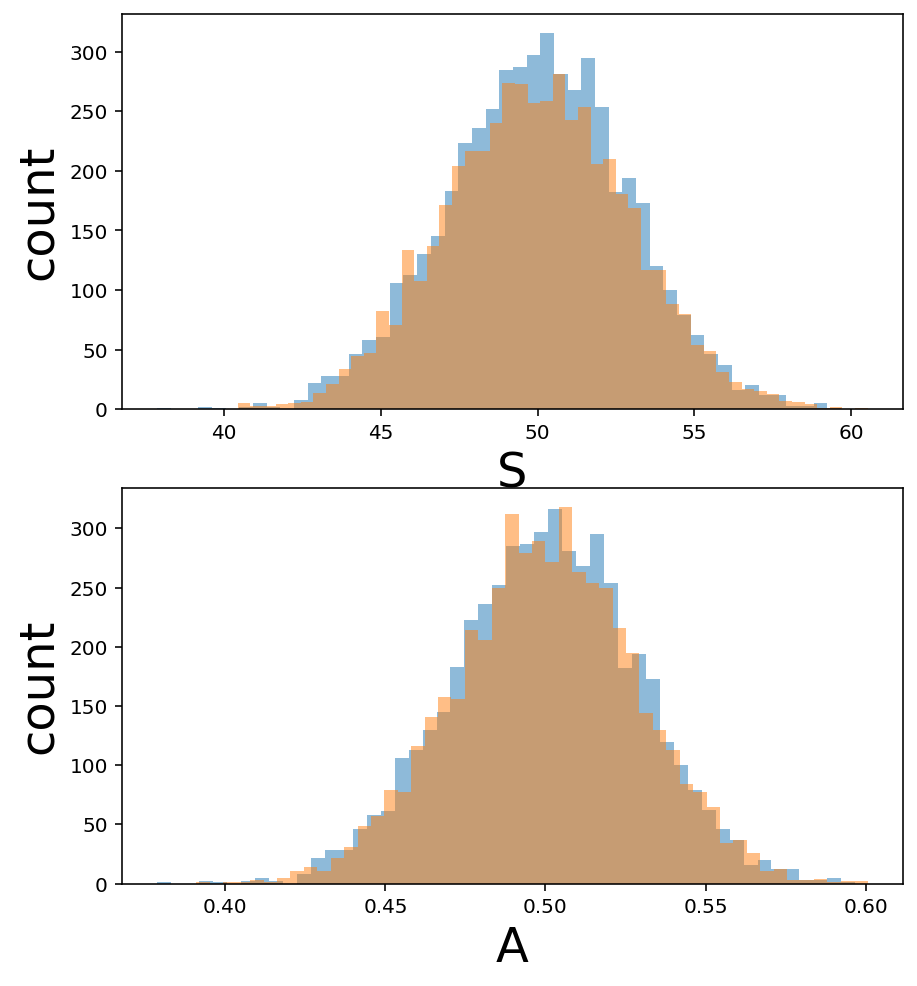

In [167]:
## we will use uniform random variable (between 0 and 1) for z. 
## The mean of z is 0.5 and the variance is 1/12
def clt(n):
    Z = rand(n)
    S = sum(Z)
    A = S/n
    return S, A

n = 100
Nsamples = 5000
S = zeros(Nsamples)
A = zeros(Nsamples)
for j in arange(Nsamples):
    s, a = clt(n)
    S[j] = s
    A[j] = a

## create normally distributed random variables
## normal(mean, standard_deviation, Nsamples)
S_CLT = normal(0.5*n, sqrt(n/12.), Nsamples)
A_CLT = normal(0.5, sqrt(1/12./n), Nsamples)

fig = figure(1, [7, 8])

fig.add_subplot(211)
hist(S, bins=50, alpha=0.5) ## alpha makes the bars opaque
hist(S_CLT, bins=50, alpha=0.5)
xlabel('S', fontsize=24)
ylabel('count', fontsize=24);
print('predicted mean of S is', 0.5*n)
print('predicted variance of S is', 1/12.*n)
print('predicted standard deviation of S is', sqrt(n/12.))

fig.add_subplot(212)
hist(A, bins=50, alpha=0.5);
hist(A_CLT, bins=50, alpha=0.5)
xlabel('A', fontsize=24)
ylabel('count', fontsize=24);
print('predicted mean of A is', 0.5)
print('predicted variance of A is', 1/12./n)
print('predicted standard deviation of A is', sqrt(1/12./n))

# Pearson random walk

>A walker starts from a point $O$ and walks $l$ yards in a straight line; he then turns through any angle whatever and walks another $l$ yards in a second straight line. He repeats this process $n$ times. I require the probability that after $n$ of these stretches he is at a distance between $r$ and $r+\delta r$ from his starting point, $O$.
>
>The problem is one of considerable interest, but I have only succeeded in obtaining an integrated solution for two   stretches. I think, however, that a solution aught to be found, if only in the form of a series of powers of $r/n$, when $n$ is large.

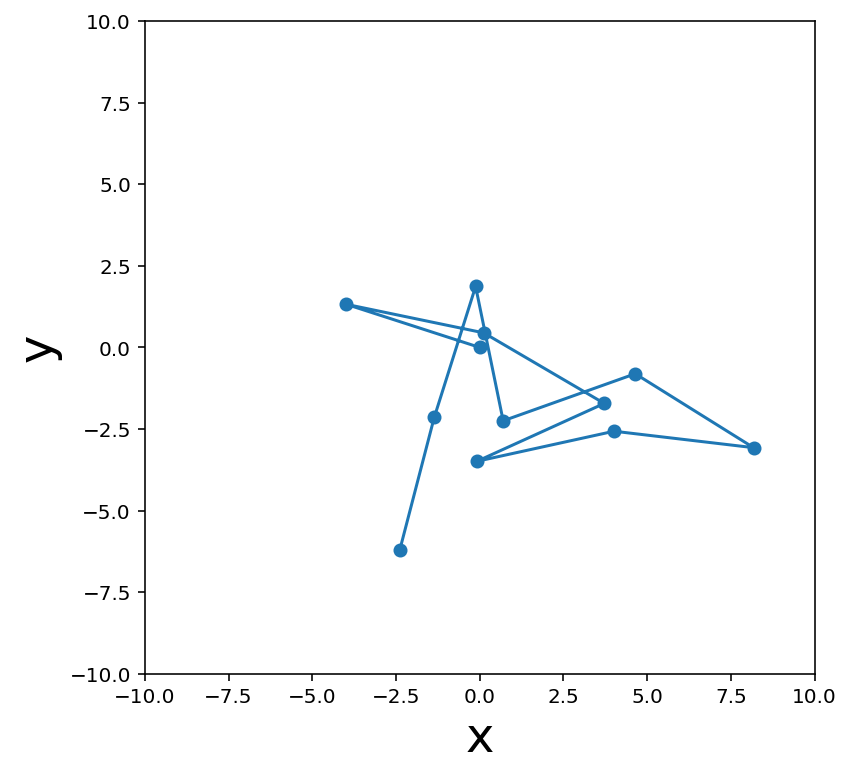

In [147]:
l = 4.2 # this is delta x
p = 0.5
x0 = 0
y0 = 0
Nsteps = 12
X = zeros(Nsteps)
Y = zeros(Nsteps)
X[0] = x0
Y[0] = y0
for j in arange(1, Nsteps):
    theta = 2*pi*rand(1) # a uniformly distributed random direction (angle)
    dx = l*cos(theta)
    dy = l*sin(theta)
    X[j] = X[j-1] + dx
    Y[j] = Y[j-1] + dy

figure(1, [6, 6])
plot(X, Y, '-o')
xlim(-10, 10)
ylim(-10, 10)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

In [99]:
theta

array([-3.13894798])

# 1D random walk (discrete time) on a lattice

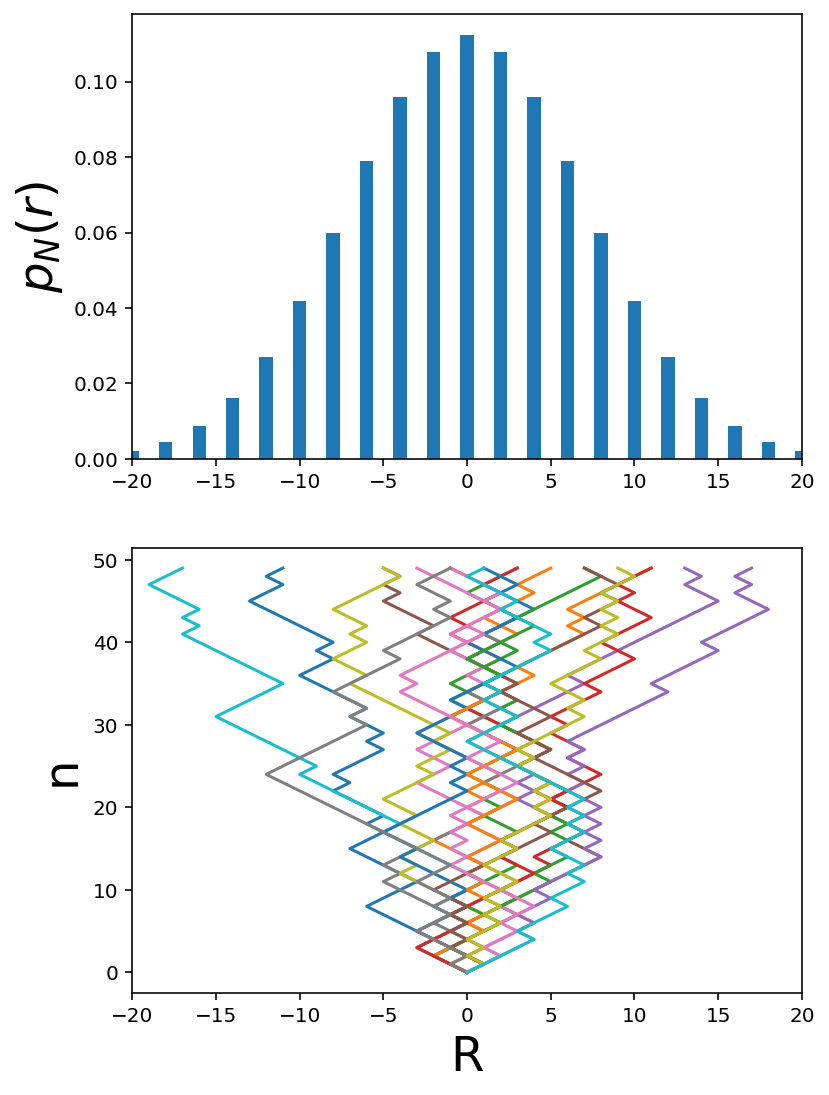

In [157]:
from scipy.special import binom

Nsteps = 50 ## must be an even number
def random_walk():
    p = 0.5
    r0 = 0
    R = zeros(Nsteps)
    R[0] = r0
    for j in arange(1, Nsteps):
        u = rand(1)
        if u < p:
            R[j] = R[j-1] + 1
        else:
            R[j] = R[j-1] - 1
    return R
Rplot = arange(-20, 21, 2)
p_Nsteps = array([binom(Nsteps, (Nsteps + rj)/2)/2**Nsteps for rj in Rplot])

fig = figure(1, [6, 9])
fig.add_subplot(211) ## create the first (top) pannel of a 2 X 1 grid of plots
bar(Rplot, p_Nsteps)
xlim(-20, 20)
ylabel(r'$p_N(r)$', fontsize=24)

fig.add_subplot(212) ## create the second (bottom) pannel of a 2 X 1 grid of plots
for n in arange(20): ## sample 10 trajectories and plot them
    R = random_walk()
    plot(R, arange(Nsteps))
xlim(-20, 20)
ylabel('n', fontsize=24)
xlabel('R', fontsize=24);


# Continuous time random walk on a lattice
Let $X(t) = \Delta x N(t)$. The integer valued random process $N(t)$ follows
$$ 
\cdots
{{kp\atop\longrightarrow}\atop {\longleftarrow \atop {k(1-p)}}}
(N=-2) 
{{kp\atop\longrightarrow}\atop {\longleftarrow \atop {k(1-p)}}}
(N=-1) 
{{kp\atop\longrightarrow}\atop {\longleftarrow \atop {k(1-p)}}}
(N=0) 
{{kp\atop\longrightarrow}\atop {\longleftarrow \atop {k(1-p)}}}
(N=1) 
{{kp\atop\longrightarrow}\atop {\longleftarrow \atop {k(1-p)}}}
(N=2) 
{{kp\atop\longrightarrow}\atop {\longleftarrow \atop {k(1-p)}}}
\cdots
$$
where $k>0$ is a transition rate constant and $p\in (0, 1)$ is the probability of stepping right ($1-p$ is the probability so stepping left).

Note: Unlike our population models $N(t)$ can take negative values in the random walk process.

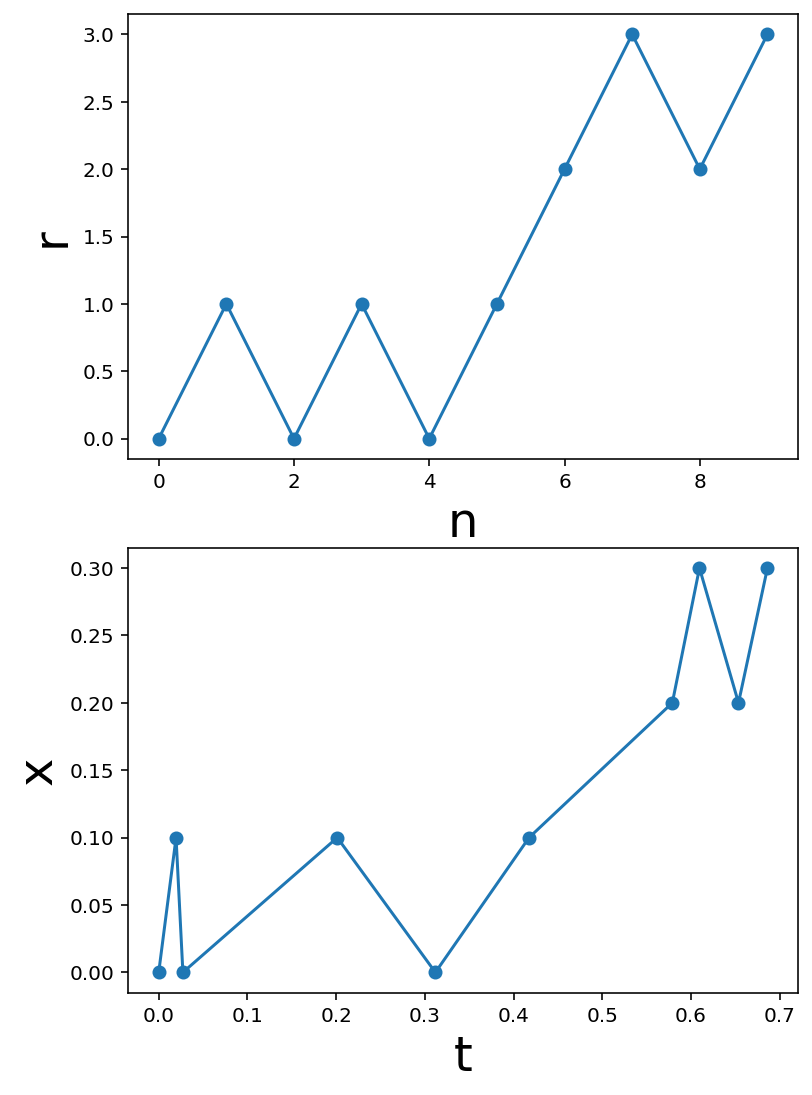

In [152]:
dx = 0.1
k = 1./dx
p = 0.5
n0 = 0
Nsteps = 10
N = zeros(Nsteps)
N[0] = n0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    n = N[j-1]
    combined_rate = k
    u = rand(1)
    tau = -log(u)/combined_rate
    T[j] = T[j-1] + tau # update time array with new time value
    ## now we make a random variable to decide if birth or death occurs
    probability_of_birth = p
    probability_of_death = 1 - probability_of_birth
    u2 = rand(1)
    if u2 < probability_of_birth:
        N[j] = N[j-1] + 1 # a birth means N -> N+1
    else:
        N[j] = N[j-1] - 1
        
fig = figure(1, [6, 9])
fig.add_subplot(211)
plot(N, '-o')
xlabel('n', fontsize=24)
ylabel('r', fontsize=24);

fig.add_subplot(212)
plot(T, dx*N, '-o')
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

# Continuum limit of the 1D continuous time random walk
We must take $k\to\infty$ and $\Delta x \to 0$ in just the right way. If we set $k = 1/\Delta x^{\alpha}$ with $\alpha>0$ then $k \to \infty$ as $\Delta x \to 0$. What is the correct value of $\alpha$?

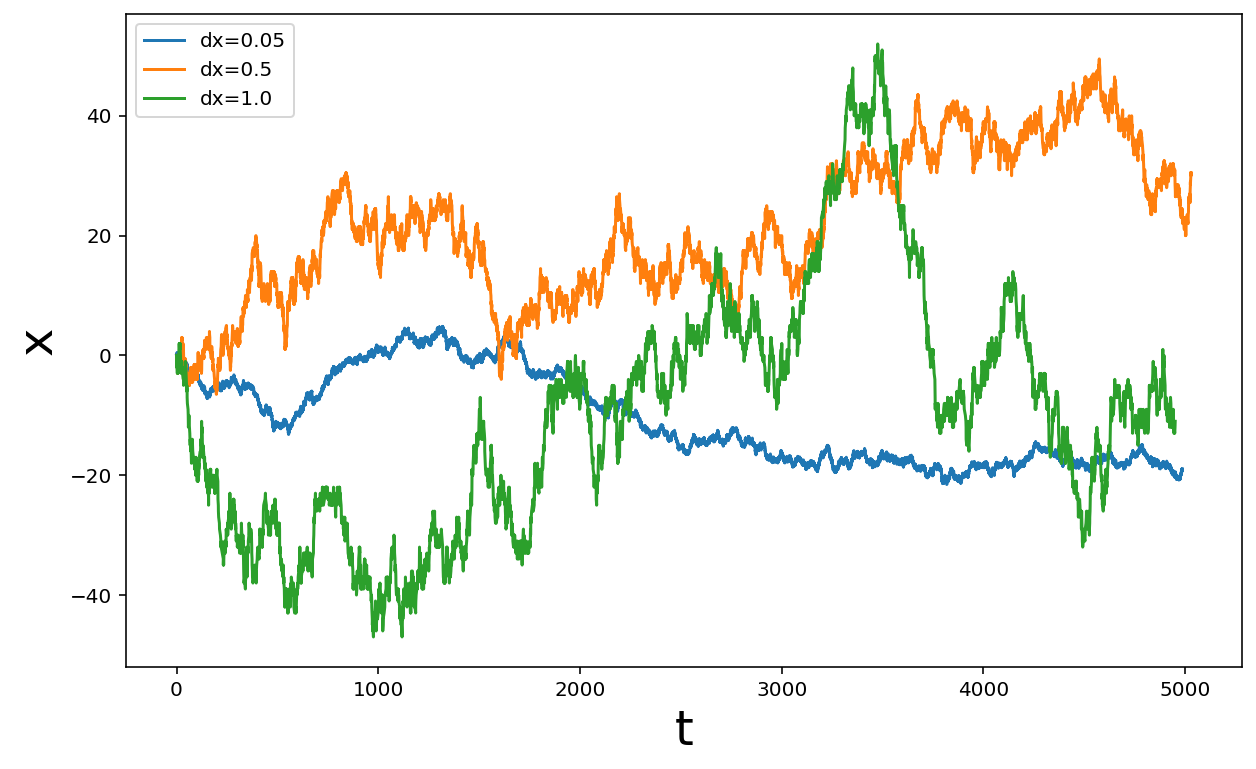

In [51]:
def CTRW(dx=1.):
    k = 1./dx
    p = 0.5
    n0 = 0
    Tmax = 5000
    Nsteps = int(Tmax*k)
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = k
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = p
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1
    return T, dx*N

figure(2, [10, 6])
for dx in [0.05, 0.5, 1.]:
    T, X = CTRW(dx)
    plot(T, X, label='dx={0}'.format(dx))
legend()
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

# Brownian motion and Euler's method
Unrestricted Brownian motion (without boundary interactions) in 1D can be sampled **exactly** with the following numerical scheme. Let $X(t)$ be the position at time $t>0$ with $X(0) = x_0$. For any $\Delta t > 0$ (it does not need to be small!) we have that
$$ X(t + \Delta t) = X(t) + \sqrt{2D\Delta t}N(0, 1),$$
where $N(0, 1)$ is a normal random variable with mean zero and unit variance (i.e., $\mu=0$ and $\sigma = 1$).
Another way of expressing this is
$$
\begin{gather*}
 X(t = N\Delta t) = \sum_{n=1}^N \Delta X_n, \\
 \Delta X_n = X(n\Delta t) - X((n-1)\Delta t) = \sqrt{2D\Delta t}N(0, 1).
\end{gather*}
$$



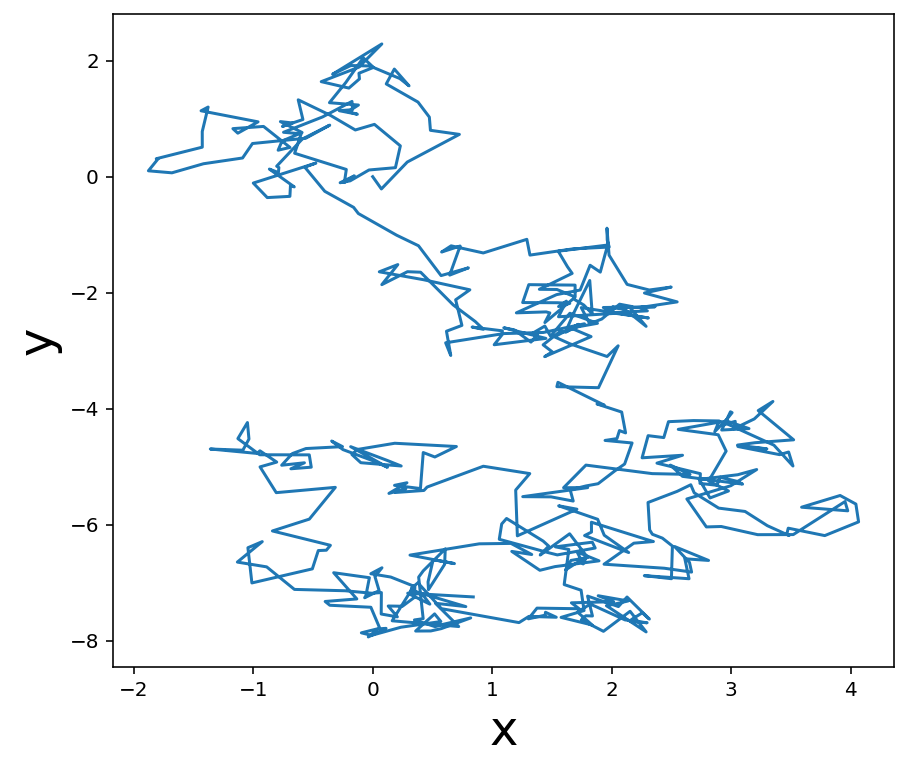

In [175]:
sigma = 1.
dt = 0.05
x0 = 0
y0 = 0
Nsteps = 500
X = zeros(Nsteps)
X[0] = x0
Y = zeros(Nsteps)
Y[0] = y0
for j in arange(1, Nsteps):
    X[j] = X[j-1] + sigma*sqrt(dt)*normal(0, 1, 1)
    Y[j] = Y[j-1] + sigma*sqrt(dt)*normal(0, 1, 1)
    
figure(1, [7, 6])    
plot(X, Y)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

# The Euler-Maruyama method for sampling an SDE
Consider an SDE of the form
$$ dX(t) = f(X(t))dt + \sigma dW(t),$$
where $f(x)$ is nice function (Lipschitz) and $W(t)$ is a Weiner process.
Given $\Delta t>0$ sufficiently small, approximation can be numerically generated with
$$ X(t + \Delta t) = X(t) + f(X(t))\Delta t + \sigma \sqrt{\Delta t} N(0, 1), $$
where $N(0, 1)$ is a normal random variable with mean zero and unit variance (i.e., $\mu=0$ and $\sigma = 1$).